# Prepare Data

In [ ]:
!rm /content/yolo_keypoints_dataset.zip


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving yolo_keypoints_dataset.zip to yolo_keypoints_dataset.zip


In [ ]:
!unzip -q /content/yolo_keypoints_dataset.zip -d yolo_keypoints_dataset

In [ ]:
import os
from glob import glob

EXPECTED_KPTS = 42
EXPECTED_FIELDS = 1 + 4 + (EXPECTED_KPTS * 2)  # class + bbox + 2 per keypoint

def validate_yolo_keypoint_dataset(split_dir):
    img_dir = os.path.join(split_dir, 'images')
    label_dir = os.path.join(split_dir, 'labels')

    assert os.path.exists(img_dir), f"Missing images folder: {img_dir}"
    assert os.path.exists(label_dir), f"Missing labels folder: {label_dir}"

    image_files = sorted(glob(os.path.join(img_dir, '*.jpg')) + glob(os.path.join(img_dir, '*.png')))
    label_files = sorted(glob(os.path.join(label_dir, '*.txt')))

    print(f"\n📁 Checking {split_dir}")
    print(f" - Found {len(image_files)} images")
    print(f" - Found {len(label_files)} label files")

    bad_labels = []
    missing_labels = []

    for img_path in image_files:
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(label_dir, img_name + ".txt")

        if not os.path.exists(label_path):
            missing_labels.append(img_name)
            continue

        with open(label_path, 'r') as f:
            lines = f.readlines()

        if len(lines) != 1:
            bad_labels.append((img_name, "Not exactly one line"))
            continue

        try:
            nums = list(map(float, lines[0].strip().split()))
        except:
            bad_labels.append((img_name, "Non-float values"))
            continue

        if len(nums) != EXPECTED_FIELDS:
            bad_labels.append((img_name, f"Expected {EXPECTED_FIELDS}, got {len(nums)}"))

    print(f" - ❌ {len(missing_labels)} missing label files")
    print(f" - ⚠️  {len(bad_labels)} bad label files")

    if missing_labels:
        print("   → Missing labels for:", missing_labels[:5])

    if bad_labels:
        print("   → Examples of bad labels:", bad_labels[:5])

    print(" ✅ Done\n")

# 🔍 Run on all splits
validate_yolo_keypoint_dataset("/content/yolo_keypoints_dataset/yolo_keypoints_dataset/train")
validate_yolo_keypoint_dataset("/content/yolo_keypoints_dataset/yolo_keypoints_dataset/val")
validate_yolo_keypoint_dataset("/content/yolo_keypoints_dataset/yolo_keypoints_dataset/test")



📁 Checking /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train
 - Found 14920 images
 - Found 14920 label files
 - ❌ 0 missing label files
 - ⚠️  14920 bad label files
   → Examples of bad labels: [('0X1002E8FBACD08477_f18', 'Expected 89, got 85'), ('0X1002E8FBACD08477_f3', 'Expected 89, got 85'), ('0X1005D03EED19C65B_f24', 'Expected 89, got 85'), ('0X1005D03EED19C65B_f35', 'Expected 89, got 85'), ('0X10075961BC11C88E_f108', 'Expected 89, got 85')]
 ✅ Done


📁 Checking /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val
 - Found 2576 images
 - Found 2576 label files
 - ❌ 0 missing label files
 - ⚠️  2576 bad label files
   → Examples of bad labels: [('0X100009310A3BD7FC_f46', 'Expected 89, got 85'), ('0X100009310A3BD7FC_f61', 'Expected 89, got 85'), ('0X10094BA0A028EAC3_f137', 'Expected 89, got 85'), ('0X10094BA0A028EAC3_f156', 'Expected 89, got 85'), ('0X1013E8A4864781B_f35', 'Expected 89, got 85')]
 ✅ Done


📁 Checking /content/yolo_keypoints_dataset/yolo_keypoints_d

# Train the Model

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11s-pose.pt")

results = model.train(
    data="data_keypoints.yaml",
    epochs=100,
    imgsz=128,
    batch=16,
    device=0,
    patience=10,       # stops training if validation metric doesn't improve for 10 epochs
    lr0=0.01,
    optimizer="Adam",
    cos_lr=False       # disable cosine decay if you prefer default linear scheduling
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data_keypoints.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train16, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True

train: Scanning /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/labels... 14920 images, 0 backgrounds, 10 corrupt: 100%|██████████| 14920/14920 [00:12<00:00, 1207.25it/s]

train: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/images/0X23B883A39F37F8D9_f160.jpg: ignoring corrupt image/label: negative class labels [  -0.011068]
train: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/images/0X25153E9120D31CC8_f70.jpg: ignoring corrupt image/label: negative class labels [  -0.014323]
train: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/images/0X2EE56F270D208DF2_f45.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0136]
train: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/images/0X63C0C93E76565075_f56.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0165      1.0234      1.0205      1.0156]
train: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/images/0X6CC0AFACCC801E35_f104.jpg: ignoring corrupt image/label: negative class labels [  -0.033333   -0.036665   -0.013879]
train: /content/yolo_keypoints_dataset/yolo_keypo

train: New cache created: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/train/labels.cache
WARNING ⚠️ No 'flip_idx' array defined in data.yaml, disabling 'fliplr' and 'flipud' augmentations.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.0±0.5 MB/s, size: 5.5 KB)


val: Scanning /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/labels... 2576 images, 0 backgrounds, 4 corrupt: 100%|██████████| 2576/2576 [00:03<00:00, 853.81it/s] 

val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X374099556945A9EA_f121.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0127      1.0159      1.0148      1.0137      1.0126       1.025      1.0193]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X50807FBC49B44ED4_f43.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0116      1.0143      1.0191]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X62473A8FCF726A75_f52.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0157      1.0271      1.0384      1.0497       1.061]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0XDB100B9990F3EB_f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]


val: New cache created: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/labels.cache
Plotting labels to runs/pose/train16/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 2 dataloader workers
Logging results to runs/pose/train16
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.645G      1.523      9.051          0     0.8921      1.319         35        128: 100%|██████████| 932/932 [02:15<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.73it/s]


                   all       2572       2572      0.945      0.942       0.98      0.644      0.126      0.117     0.0241    0.00361

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.709G       1.35      7.863          0     0.7489      1.232         35        128: 100%|██████████| 932/932 [02:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.59it/s]


                   all       2572       2572      0.993      0.991      0.995      0.638      0.173      0.164     0.0358    0.00601

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/100      0.77G      1.255      7.482          0     0.6991      1.187         29        128: 100%|██████████| 932/932 [02:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.73it/s]


                   all       2572       2572      0.992      0.992      0.995      0.629      0.283       0.27     0.0989      0.018

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.834G      1.197      7.213          0     0.6624       1.16         29        128: 100%|██████████| 932/932 [02:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.59it/s]

                   all       2572       2572      0.992      0.991      0.995       0.74      0.236      0.229     0.0764     0.0143



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.896G      1.149      7.029          0      0.635      1.139         27        128: 100%|██████████| 932/932 [02:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.90it/s]

                   all       2572       2572      0.996      0.994      0.995      0.749      0.279      0.272      0.119     0.0247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.941G      1.132      6.902          0     0.6241      1.132         32        128: 100%|██████████| 932/932 [02:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:15<00:00,  5.23it/s]

                   all       2572       2572      0.984      0.976      0.994      0.582      0.308      0.268      0.147     0.0323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.01G      1.112      6.858          0      0.618      1.126         22        128: 100%|██████████| 932/932 [02:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.81it/s]

                   all       2572       2572      0.996      0.994      0.995      0.753      0.367      0.361      0.175     0.0365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.07G      1.103      6.801          0     0.6063      1.119         30        128: 100%|██████████| 932/932 [02:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:15<00:00,  5.27it/s]


                   all       2572       2572      0.997      0.998      0.995      0.764      0.399      0.382      0.217     0.0471

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.11G      1.075      6.755          0     0.5984       1.11         32        128: 100%|██████████| 932/932 [02:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.83it/s]

                   all       2572       2572      0.997      0.996      0.995      0.729      0.363      0.355       0.22     0.0508



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.18G      1.081      6.704          0     0.5954       1.11         19        128: 100%|██████████| 932/932 [02:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.86it/s]

                   all       2572       2572      0.996      0.997      0.995       0.77      0.383       0.36      0.185     0.0407



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.24G       1.07      6.689          0      0.595      1.108         31        128: 100%|██████████| 932/932 [02:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.84it/s]

                   all       2572       2572      0.996      0.995      0.995      0.739        0.4      0.386      0.204     0.0442



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.31G       1.06      6.693          0     0.5855      1.099         22        128: 100%|██████████| 932/932 [02:01<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.81it/s]

                   all       2572       2572      0.998      0.994      0.995      0.727      0.416      0.408      0.231     0.0534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.37G      1.073      6.654          0     0.5924      1.105         27        128: 100%|██████████| 932/932 [02:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.62it/s]

                   all       2572       2572      0.998      0.997      0.995      0.758      0.402      0.394      0.232     0.0555



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.43G      1.055       6.61          0     0.5843      1.097         32        128: 100%|██████████| 932/932 [02:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.80it/s]

                   all       2572       2572      0.997      0.997      0.995      0.783      0.419      0.412      0.248     0.0576



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.48G      1.056      6.623          0     0.5818        1.1         37        128: 100%|██████████| 932/932 [02:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.68it/s]

                   all       2572       2572      0.998      0.997      0.995       0.77      0.426      0.422      0.242     0.0547



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.54G      1.035      6.587          0     0.5744      1.094         38        128: 100%|██████████| 932/932 [02:04<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.73it/s]

                   all       2572       2572      0.998      0.995      0.995      0.796      0.421      0.412      0.256     0.0603



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.61G      1.041      6.565          0     0.5761      1.093         30        128: 100%|██████████| 932/932 [02:05<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.69it/s]

                   all       2572       2572      0.998      0.996      0.995      0.793      0.448      0.441      0.274     0.0658



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.67G      1.044       6.58          0     0.5826      1.097         28        128: 100%|██████████| 932/932 [02:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.79it/s]

                   all       2572       2572      0.999      0.997      0.995      0.761      0.429      0.418       0.21     0.0456



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.71G      1.038      6.591          0      0.575      1.096         18        128: 100%|██████████| 932/932 [02:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.78it/s]

                   all       2572       2572      0.997      0.997      0.995      0.782      0.439      0.435       0.26     0.0637



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.78G      1.038      6.538          0     0.5803      1.095         26        128: 100%|██████████| 932/932 [02:03<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.71it/s]

                   all       2572       2572      0.998      0.996      0.995      0.776      0.437      0.432      0.258     0.0628



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.84G      1.025      6.486          0     0.5672      1.087         33        128: 100%|██████████| 932/932 [02:03<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.77it/s]

                   all       2572       2572      0.998      0.996      0.995      0.785      0.462      0.453      0.275     0.0633



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.89G      1.029      6.468          0     0.5638      1.089         30        128: 100%|██████████| 932/932 [02:03<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.67it/s]

                   all       2572       2572      0.999      0.997      0.995      0.779      0.459      0.454      0.247     0.0574



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.95G      1.013      6.503          0     0.5609      1.087         25        128: 100%|██████████| 932/932 [02:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.80it/s]

                   all       2572       2572      0.998      0.996      0.995      0.792      0.462      0.454      0.324     0.0846



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.02G      1.021      6.478          0     0.5651      1.083         25        128: 100%|██████████| 932/932 [02:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.81it/s]

                   all       2572       2572      0.998      0.998      0.995      0.801      0.461      0.455      0.305     0.0775



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.08G      1.028      6.534          0     0.5655      1.089         23        128: 100%|██████████| 932/932 [02:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.74it/s]

                   all       2572       2572      0.998      0.997      0.995      0.807      0.464      0.455      0.286     0.0695



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.14G      1.006      6.468          0     0.5549      1.081         30        128: 100%|██████████| 932/932 [02:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.67it/s]

                   all       2572       2572      0.998      0.998      0.995      0.793      0.486      0.476      0.309     0.0756



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.21G      1.012      6.473          0     0.5618      1.081         26        128: 100%|██████████| 932/932 [02:04<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.58it/s]

                   all       2572       2572      0.998      0.997      0.995      0.754      0.479      0.466      0.285     0.0687



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G      1.007      6.418          0     0.5619      1.081         26        128: 100%|██████████| 932/932 [02:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.78it/s]

                   all       2572       2572      0.999      0.997      0.995      0.799      0.486      0.479      0.291     0.0711



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.31G      1.007      6.384          0     0.5545      1.082         22        128: 100%|██████████| 932/932 [02:05<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.66it/s]

                   all       2572       2572      0.999      0.997      0.995      0.811      0.486      0.478      0.333     0.0866



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.38G     0.9968      6.387          0     0.5544      1.073         29        128: 100%|██████████| 932/932 [02:01<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.75it/s]

                   all       2572       2572      0.999      0.997      0.995        0.8       0.49      0.482       0.32     0.0798



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.44G      1.015       6.43          0     0.5626      1.086         26        128: 100%|██████████| 932/932 [02:01<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.89it/s]

                   all       2572       2572      0.998      0.997      0.995      0.786      0.487      0.478       0.33     0.0835



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.49G     0.9969       6.39          0     0.5566      1.077         35        128: 100%|██████████| 932/932 [02:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.84it/s]

                   all       2572       2572      0.998      0.998      0.995      0.791      0.486       0.48      0.341     0.0887



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.55G     0.9999      6.387          0     0.5524      1.079         35        128: 100%|██████████| 932/932 [02:02<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.80it/s]

                   all       2572       2572      0.998      0.997      0.995      0.784      0.492      0.485       0.36     0.0963



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.62G     0.9849      6.362          0     0.5478      1.074         28        128: 100%|██████████| 932/932 [02:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.65it/s]


                   all       2572       2572      0.999      0.997      0.995      0.784      0.489      0.483      0.324     0.0834

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.66G     0.9905      6.393          0     0.5463      1.072         23        128: 100%|██████████| 932/932 [02:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.94it/s]

                   all       2572       2572      0.999      0.997      0.995      0.803      0.494      0.489      0.337     0.0887



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.72G     0.9871      6.367          0     0.5457      1.073         32        128: 100%|██████████| 932/932 [02:01<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.91it/s]

                   all       2572       2572      0.999      0.997      0.995      0.815      0.499      0.489      0.364     0.0984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.79G     0.9853      6.347          0     0.5416      1.072         28        128: 100%|██████████| 932/932 [02:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.89it/s]

                   all       2572       2572      0.998      0.997      0.995      0.794      0.503      0.496      0.358     0.0959



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.85G     0.9836      6.311          0     0.5399       1.07         20        128: 100%|██████████| 932/932 [02:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.93it/s]

                   all       2572       2572      0.999      0.997      0.995      0.793      0.496      0.487      0.338     0.0911



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.92G     0.9833      6.287          0     0.5428      1.072         29        128: 100%|██████████| 932/932 [02:03<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.84it/s]

                   all       2572       2572      0.999      0.997      0.995      0.799       0.51        0.5      0.342     0.0879



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.98G      0.984      6.293          0     0.5382      1.068         21        128: 100%|██████████| 932/932 [02:03<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.54it/s]


                   all       2572       2572      0.998      0.997      0.995      0.805      0.511        0.5       0.35      0.091

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.03G     0.9744      6.343          0     0.5378      1.067         23        128: 100%|██████████| 932/932 [02:03<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.89it/s]

                   all       2572       2572      0.999      0.996      0.995      0.801      0.505      0.496      0.338     0.0886



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.09G     0.9685      6.365          0      0.531      1.065         24        128: 100%|██████████| 932/932 [02:00<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.89it/s]

                   all       2572       2572      0.999      0.997      0.995      0.818      0.503      0.496       0.36     0.0972



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.15G     0.9757      6.305          0     0.5417      1.068         30        128: 100%|██████████| 932/932 [02:06<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.80it/s]

                   all       2572       2572      0.998      0.998      0.995      0.818      0.506      0.497      0.359     0.0963



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.22G     0.9705      6.261          0     0.5379      1.068         25        128: 100%|██████████| 932/932 [02:02<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.80it/s]

                   all       2572       2572      0.998      0.998      0.995      0.812      0.505      0.495      0.355     0.0944



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.26G     0.9685      6.297          0       0.53      1.065         23        128: 100%|██████████| 932/932 [02:02<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.87it/s]

                   all       2572       2572      0.998      0.997      0.995      0.805      0.506      0.494      0.357     0.0957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.32G     0.9614      6.238          0     0.5286      1.063         33        128: 100%|██████████| 932/932 [02:00<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.71it/s]

                   all       2572       2572      0.998      0.998      0.995      0.798      0.511      0.498      0.351     0.0915



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.39G     0.9625      6.234          0     0.5254      1.063         30        128: 100%|██████████| 932/932 [02:01<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.94it/s]

                   all       2572       2572      0.998      0.998      0.995      0.813      0.514      0.503      0.372      0.102



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.45G     0.9605      6.261          0       0.53      1.062         23        128: 100%|██████████| 932/932 [01:59<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.81it/s]

                   all       2572       2572      0.998      0.998      0.995      0.813       0.51      0.499      0.368      0.101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.5G     0.9613      6.218          0     0.5286      1.059         24        128: 100%|██████████| 932/932 [02:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:13<00:00,  5.88it/s]

                   all       2572       2572      0.998      0.998      0.995      0.814      0.505      0.497      0.361     0.0992



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.56G     0.9527      6.271          0     0.5289      1.058         23        128: 100%|██████████| 932/932 [02:05<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:14<00:00,  5.60it/s]

                   all       2572       2572      0.998      0.998      0.995      0.812      0.503      0.494      0.349      0.096



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.62G     0.9569      6.301          0     0.5276      1.056         30        128:  38%|███▊      | 355/932 [00:48<01:19,  7.30it/s]


KeyboardInterrupt: 

In [ ]:
# 1. Zip the folder (e.g. 'yolo_keypoints_dataset_fixed21')
!zip -r runs.zip runs

# 2. Download the zip to your local machine
from google.colab import files
files.download('runs.zip')


updating: runs/ (stored 0%)
updating: runs/pose/ (stored 0%)
updating: runs/pose/train/ (stored 0%)
updating: runs/pose/train/weights/ (stored 0%)
updating: runs/pose/train/args.yaml (deflated 52%)
  adding: runs/pose/train12/ (stored 0%)
  adding: runs/pose/train12/weights/ (stored 0%)
  adding: runs/pose/train12/args.yaml (deflated 52%)
  adding: runs/pose/train7/ (stored 0%)
  adding: runs/pose/train7/weights/ (stored 0%)
  adding: runs/pose/train7/args.yaml (deflated 52%)
  adding: runs/pose/train13/ (stored 0%)
  adding: runs/pose/train13/weights/ (stored 0%)
  adding: runs/pose/train13/args.yaml (deflated 52%)
  adding: runs/pose/train15/ (stored 0%)
  adding: runs/pose/train15/weights/ (stored 0%)
  adding: runs/pose/train15/args.yaml (deflated 52%)
  adding: runs/pose/train14/ (stored 0%)
  adding: runs/pose/train14/weights/ (stored 0%)
  adding: runs/pose/train14/args.yaml (deflated 52%)
  adding: runs/pose/train2/ (stored 0%)
  adding: runs/pose/train2/weights/ (stored 0%)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluate

In [8]:
# Cell ×: Evaluate
model = YOLO("runs/pose/train16/weights/best.pt")
metrics = model.val(data="data_keypoints.yaml", imgsz=128, device=0)
print(metrics)


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-pose summary (fused): 109 layers, 10,251,027 parameters, 0 gradients, 24.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 201.0±54.2 MB/s, size: 5.6 KB)


val: Scanning /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/labels.cache... 2576 images, 0 backgrounds, 4 corrupt: 100%|██████████| 2576/2576 [00:00<?, ?it/s]

val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X374099556945A9EA_f121.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0127      1.0159      1.0148      1.0137      1.0126       1.025      1.0193]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X50807FBC49B44ED4_f43.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0116      1.0143      1.0191]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0X62473A8FCF726A75_f52.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0157      1.0271      1.0384      1.0497       1.061]
val: /content/yolo_keypoints_dataset/yolo_keypoints_dataset/val/images/0XDB100B9990F3EB_f2.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 161/161 [00:22<00:00,  7.21it/s]


                   all       2572       2572      0.998      0.998      0.995      0.813      0.514      0.502      0.371      0.102
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/pose/val
ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78d07c686510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016

In [11]:
results = model.predict(source='/content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X100CF05D141FF143_f132.jpg', save=False, imgsz=128)



image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X100CF05D141FF143_f132.jpg: 128x128 1 chamber, 12.2ms
Speed: 1.0ms preprocess, 12.2ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 128)


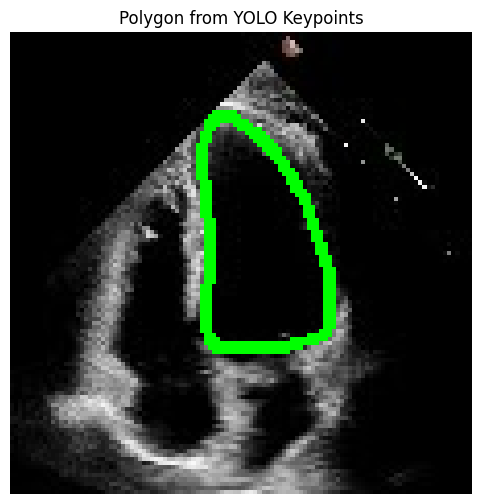

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = results[0].orig_img.copy()
# Extract keypoints (shape: [num_detections, num_keypoints, 3] - x, y, confidence)
keypoints = results[0].keypoints.data.cpu().numpy()  # shape: (1, 40, 3) for one detection
keypoints = keypoints[0][:, :2]  # shape: (40, 2) — just x, y coordinates

# Calculate centroid
center = np.mean(keypoints, axis=0)

# Sort points by angle around the center (for polygon)
angles = np.arctan2(keypoints[:, 1] - center[1], keypoints[:, 0] - center[0])
sorted_idx = np.argsort(angles)
sorted_points = keypoints[sorted_idx]

# Convert to int32 for drawing
sorted_points = np.array(sorted_points, dtype=np.int32)

# Draw polygon on the image
cv2.polylines(img, [sorted_points], isClosed=True, color=(0, 255, 0), thickness=2)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Polygon from YOLO Keypoints")
plt.axis("off")
plt.show()



image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X100CF05D141FF143_f132.jpg: 128x128 1 chamber, 10.4ms
Speed: 0.5ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 128, 128)


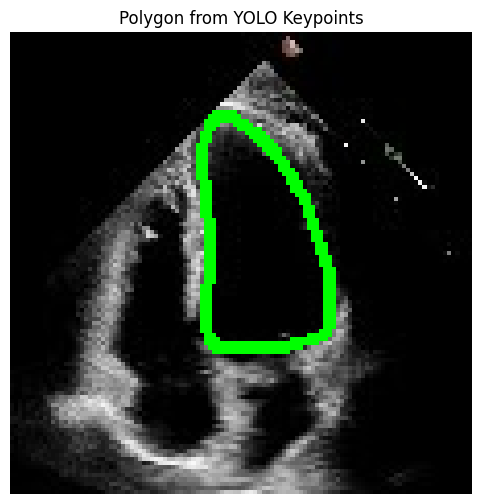

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X100CF05D141FF143_f148.jpg: 128x128 1 chamber, 15.2ms
Speed: 0.9ms preprocess, 15.2ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 128)


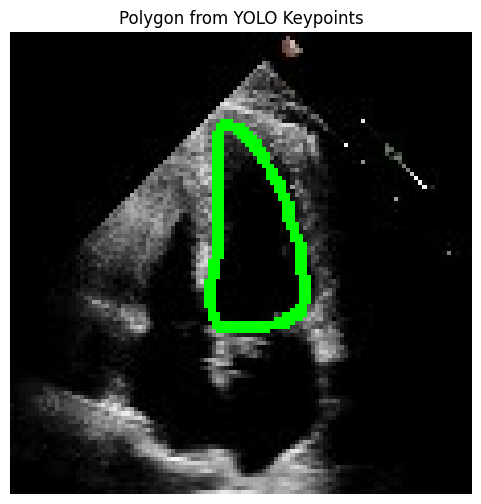

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X1012703CDC1436FE_f154.jpg: 128x128 1 chamber, 18.1ms
Speed: 0.8ms preprocess, 18.1ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 128)


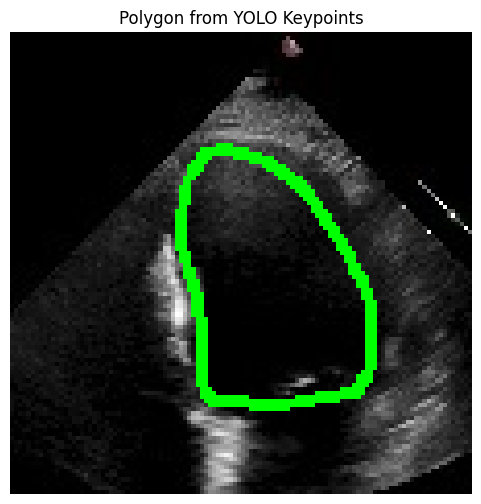

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X1012703CDC1436FE_f172.jpg: 128x128 1 chamber, 15.6ms
Speed: 1.0ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 128, 128)


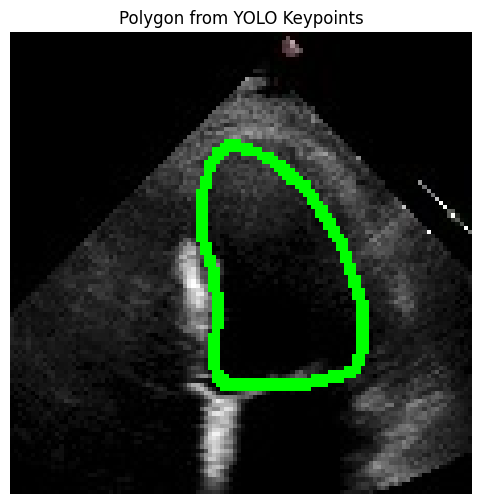

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X102CFB07F752AAE6_f163.jpg: 128x128 1 chamber, 15.1ms
Speed: 0.8ms preprocess, 15.1ms inference, 2.1ms postprocess per image at shape (1, 3, 128, 128)


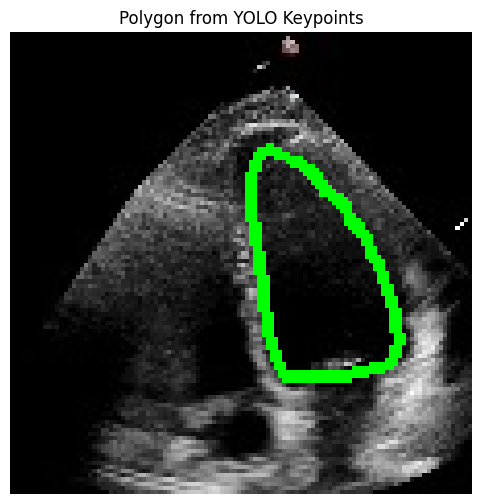

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X102CFB07F752AAE6_f184.jpg: 128x128 1 chamber, 17.4ms
Speed: 0.8ms preprocess, 17.4ms inference, 2.1ms postprocess per image at shape (1, 3, 128, 128)


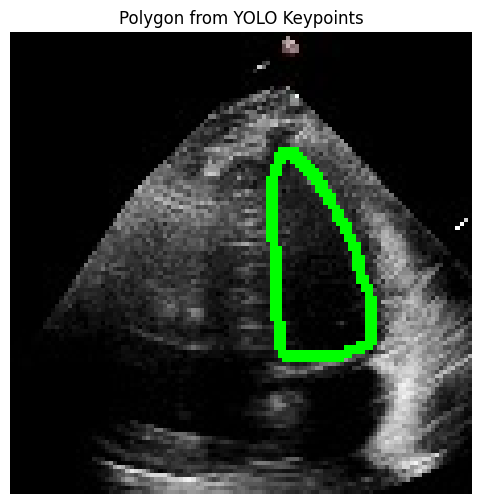

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X105B9EF57DE45DCB_f106.jpg: 128x128 1 chamber, 21.5ms
Speed: 1.1ms preprocess, 21.5ms inference, 2.3ms postprocess per image at shape (1, 3, 128, 128)


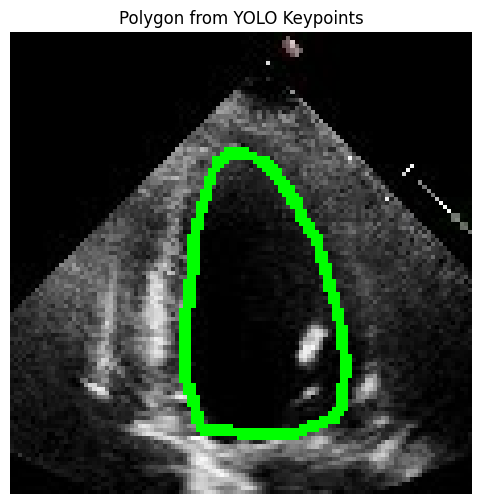

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X105B9EF57DE45DCB_f121.jpg: 128x128 1 chamber, 18.3ms
Speed: 0.8ms preprocess, 18.3ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 128)


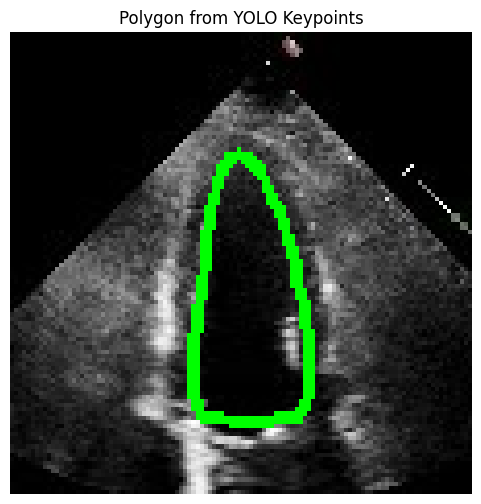

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X10A28877E97DF540_f69.jpg: 128x128 1 chamber, 19.4ms
Speed: 0.9ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 128, 128)


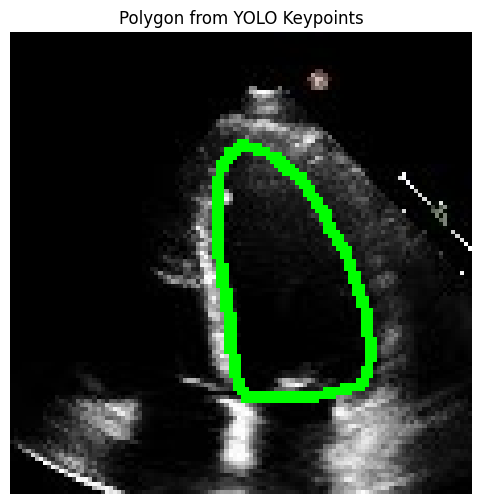

 

image 1/1 /content/yolo_keypoints_dataset/yolo_keypoints_dataset/test/images/0X10A28877E97DF540_f87.jpg: 128x128 1 chamber, 21.3ms
Speed: 0.7ms preprocess, 21.3ms inference, 2.1ms postprocess per image at shape (1, 3, 128, 128)


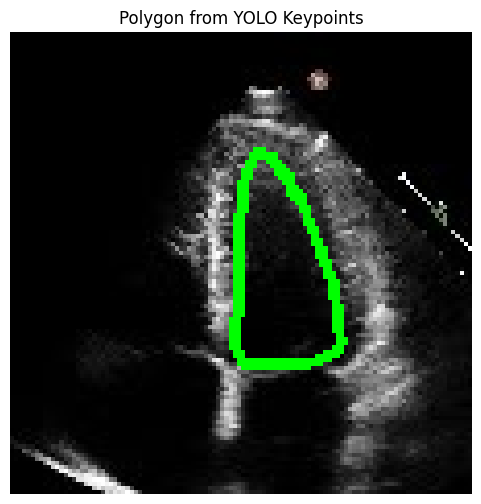

In [20]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("runs/pose/train16/weights/best.pt")
test_images = sorted((Path('yolo_keypoints_dataset/yolo_keypoints_dataset/')/"test"/"images").glob("*.jpg"))

for img_path in test_images[:10]:
    results = model.predict(source=str(img_path), save=False, imgsz=128)
    img = results[0].orig_img.copy()
    # Extract keypoints (shape: [num_detections, num_keypoints, 3] - x, y, confidence)
    keypoints = results[0].keypoints.data.cpu().numpy()  # shape: (1, 40, 3) for one detection
    keypoints = keypoints[0][:, :2]  # shape: (40, 2) — just x, y coordinates

    # Calculate centroid
    center = np.mean(keypoints, axis=0)

    # Sort points by angle around the center (for polygon)
    angles = np.arctan2(keypoints[:, 1] - center[1], keypoints[:, 0] - center[0])
    sorted_idx = np.argsort(angles)
    sorted_points = keypoints[sorted_idx]

    # Convert to int32 for drawing
    sorted_points = np.array(sorted_points, dtype=np.int32)

    # Draw polygon on the image
    cv2.polylines(img, [sorted_points], isClosed=True, color=(0, 255, 0), thickness=2)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Polygon from YOLO Keypoints")
    plt.axis("off")
    plt.show()
    print(' ')

